In [52]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency
%matplotlib inline

Follow all Data Exploration steps.

In [53]:
#Loading the dataset
df1= pd.read_csv(r"C:\Users\Dell\Desktop\Internshala\train.csv")
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [54]:
df2 = pd.read_csv(r"C:\Users\Dell\Desktop\Internshala\test.csv")
df2.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Let's Identify the dependent(target) and independent variables by observing given features in dataset.

In [55]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [56]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

We can say that "Target" variable is "subscribed" as it is not presnt in test data and also by observing question we can say.

In [57]:
df1.shape 

(31647, 18)

Here we can observe that 17 features are independent variables and 1 is target varaible i.e "subscribed"

# Identification of Categorical and Continuous Variables

In [58]:
df1.dtypes
#identify categorical and continuous variables

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Here pandas store categorical variables as objects and continuous variables as int,float..By this we can identify categorical and continuous varible.W e can observe our target variable is of type categorical.

# Implementation of Univariate Analysis for Categorical Variables

In [59]:
#creating frequency table for categorical variable 'SUBSCRIBED'
df1["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [60]:
a=len(df1["subscribed"]) #Total length(rows) for Sex varaible
a

31647

In [61]:
#creating percentages from frequencies
df1["subscribed"].value_counts()/a

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

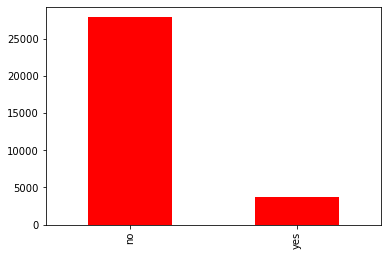

In [62]:
#creating bar plot for sex frequencies
df1["subscribed"].value_counts().plot.bar(color = "red")

By observing we can say ,3715 users out of total 31647 have subscribed .
now explore the variables to have a better understanding of the dataset. 

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

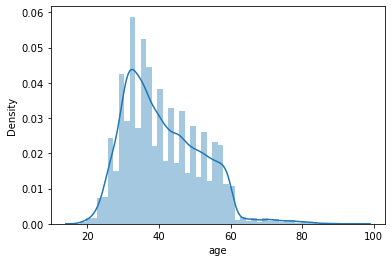

In [63]:
#Age variable
sn.distplot(df1["age"])

We can infer that most of the customers fall in the age group between 20-60. 

<AxesSubplot:>

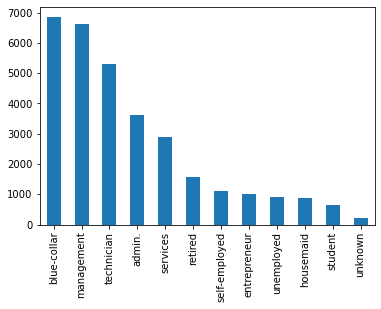

In [85]:
#Job variable
df1['job'].value_counts().plot.bar()

We can infert that most of the customers belongs to blue-collar job.

<AxesSubplot:>

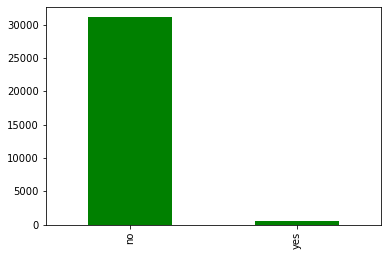

In [86]:
df1['default'].value_counts().plot.bar(color = "green")

We can infer that More than 90% of the customers have no default history. 

we will explore these variables against the target variable using bivariate analysis. 

# Bivarient Analysis For Categorical-Categorical

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0.5, 1.0, 'Job Vs Subscribed')

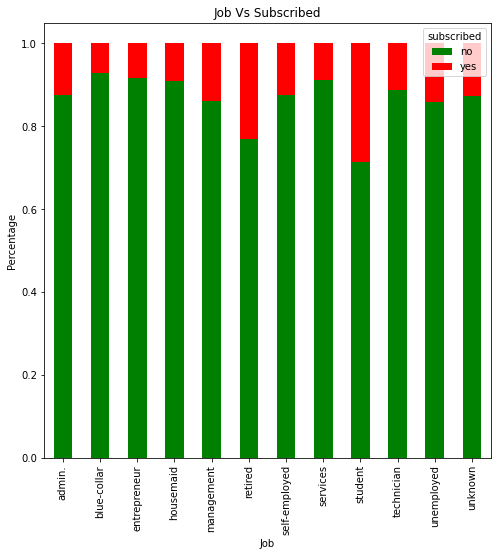

In [82]:
#Job vs subscribed
#Categorical  VS Categorical
b=pd.crosstab(df1['job'],df1['subscribed'])
print(b)
b.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,color = "gr", figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.title("Job Vs Subscribed")

In [75]:
chi2_contingency(pd.crosstab(df1['subscribed'],df1['age']))

(1100.434597491118,
 5.620105585403976e-182,
 75,
 array([[7.06089045e+00, 1.94174487e+01, 3.44218409e+01, 4.23653427e+01,
         7.59045723e+01, 1.25330805e+02, 1.87113597e+02, 3.23035738e+02,
         4.97792777e+02, 5.53397289e+02, 6.43423642e+02, 7.51984833e+02,
         1.07590318e+03, 1.25066022e+03, 1.28596467e+03, 1.24095150e+03,
         1.16592954e+03, 1.15975126e+03, 1.09885108e+03, 1.04236395e+03,
         8.69372136e+02, 9.52337599e+02, 8.47306854e+02, 8.02293677e+02,
         7.70519670e+02, 7.24623882e+02, 6.93732486e+02, 7.44923942e+02,
         7.12267324e+02, 6.61075868e+02, 6.15180080e+02, 6.17827914e+02,
         5.81640851e+02, 5.76345183e+02, 5.88701741e+02, 5.29566784e+02,
         5.26918950e+02, 5.13679780e+02, 4.79257939e+02, 5.08384112e+02,
         4.50131766e+02, 4.85436218e+02, 3.70696749e+02, 9.62046324e+01,
         4.06001201e+01, 4.32479540e+01, 4.14827314e+01, 3.26566183e+01,
         4.06001201e+01, 3.53044522e+01, 2.29478940e+01, 2.82435618e+01,
 

In [87]:
#Replace no with 0 and yes with 1
df1['subscribed'].replace('no', 0,inplace=True)
df1['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

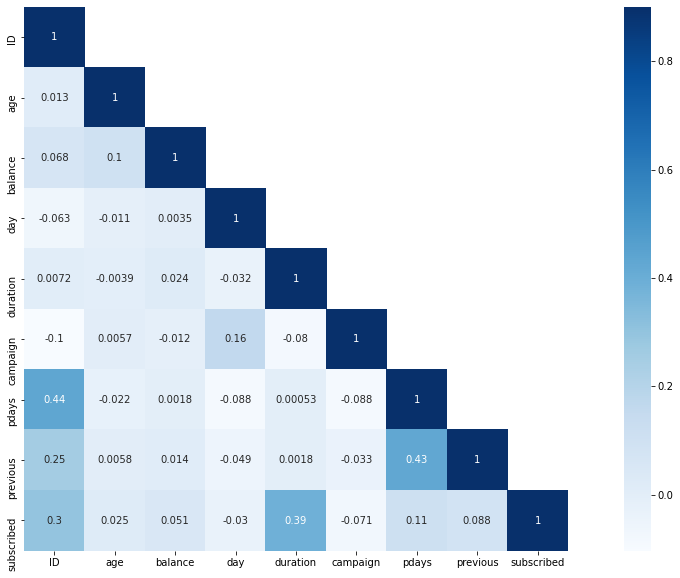

In [93]:
corr = df1.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="Blues")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

# Implementation Of Treating Missing Values

In [94]:
df1.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We can see there are no missing values in the train dataset.
Now, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

# Model Building

In [96]:
target = df1['subscribed']
df1 = df1.drop('subscribed',1)

In [97]:
# applying dummies on the train dataset
df1 = pd.get_dummies(df1)

In [101]:
from sklearn.model_selection import train_test_split
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(df1, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

In [102]:
from sklearn.linear_model import LogisticRegression
# defining the logistic regression model
lreg = LogisticRegression()
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [104]:
from sklearn.metrics import accuracy_score
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8894154818325435

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

Let's try decision tree algorithm now to check if we get better accuracy with that.

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [106]:
# making prediction on the validation set
predict = clf.predict(X_val)
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

We got an accuracy of more than 90% on the validation set. 

In [108]:
#similar process as train dataset
df2 = pd.get_dummies(df2)
test_prediction = clf.predict(df2)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [111]:
submission = pd.DataFrame()
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = df2['ID']
submission['subscribed'] = test_prediction

In [112]:
#convert to numveric
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [114]:
submission.to_csv(r"C:\Users\Dell\Desktop\Internshala\submission.csv", header=True, index=False)